# Wine Quality Prediction Model

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
correlations = wine.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


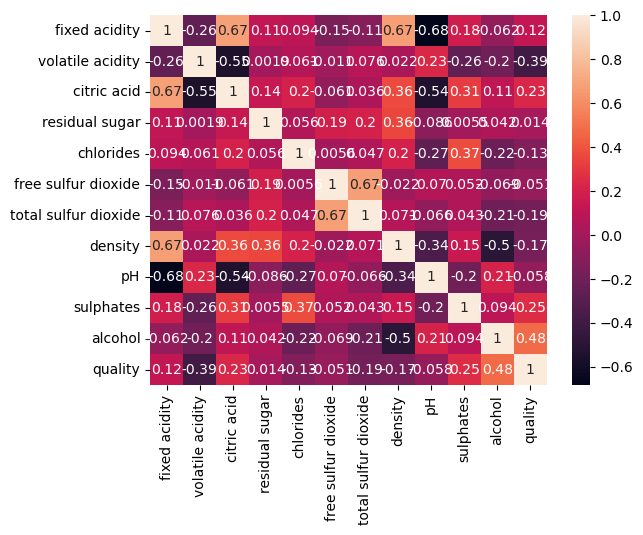

In [7]:
sns.heatmap(wine.corr(), annot = True)
plt.show()

In [8]:
# taking features with correlation more than 0.05 as input x and quality as target variable y 
x = wine[['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','alcohol']]
y = wine['quality']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [10]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)
  
# this gives the coefficients of the 10 features selected above.  
print(regressor.coef_)

[ 5.71401063e-02 -1.05156404e+00 -1.75098273e-01 -1.34540580e+00
 -2.02547374e-03 -1.97573155e+01  8.50300047e-01  2.80859031e-01]


In [11]:
#To predict the quality of wine with this model, use predict().
train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test) 
print(test_pred)

[5.36144941 5.37766853 5.98416194 ... 6.30262345 6.20939841 5.09354141]
[5.15283071 5.67953025 5.85590216 6.17766012 5.02046466 5.40634971
 5.07461935 6.14082176 5.49366602 5.8821023  5.64531719 5.29674728
 5.15428349 5.34468536 6.40838335 5.09499687 5.87507855 5.16762742
 6.04294003 6.28066841 6.45891527 5.55093695 5.82051478 4.9744651
 5.17723334 5.48191148 5.16796539 6.47324615 5.96258253 5.68528904
 6.05139983 6.30198006 4.94041251 5.88831081 5.1145699  5.90311819
 6.86863864 5.12671204 5.31492857 5.88831081 5.18251946 4.75643889
 6.51532745 5.45279541 5.26667253 5.8284522  5.68039287 5.17821857
 5.21873179 5.4414416  5.10489074 5.63997761 6.00397219 6.31115098
 5.43600809 5.3256197  5.0992145  4.94561503 5.22236884 5.10664613
 4.82468541 5.46194456 5.24588881 5.64560249 5.7868814  6.50037001
 5.36281411 5.69431996 5.21455544 6.01309322 5.62828578 5.61625622
 5.74118138 4.9903284  5.91876323 5.52390503 5.36908176 5.72981238
 5.6711092  5.68528904 6.1551785  5.28235481 4.68075083 5.

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# calculating rmse
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))


0.6548318850860843
0.6288818933675822
[5. 6. 6. 6. 5. 5. 5. 6. 5. 6. 6. 5. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5.
 5. 5. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6. 7. 5. 5. 6. 5. 5. 7. 5. 5. 6. 6. 5.
 5. 5. 5. 6. 6. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 7. 5. 6. 5. 6. 6. 6.
 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 5. 6.
 5. 5. 5. 7. 6. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 5. 7. 6. 5. 5. 5. 5. 6. 6.
 6. 5. 5. 5. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 7. 6. 6. 6. 5. 5. 6. 7. 5. 5.
 6. 5. 6. 6. 7. 5. 5. 5. 6. 5. 5. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 5.
 5. 6. 6. 7. 5. 6. 6. 5. 6. 6. 5. 6. 7. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7.
 5. 5. 5. 5. 5. 6. 6. 5. 5. 5. 6. 6. 5. 6. 5. 6. 5. 5. 6. 5. 6. 6. 6. 6.
 6. 5. 5. 5. 5. 5. 6. 5. 6. 5. 7. 5. 5. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 5.
 6. 6. 6. 5. 7. 6. 6. 5. 5. 6. 5. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6.
 5. 6. 5. 6. 5. 5. 7. 5. 6. 6. 6. 6. 5. 5. 5. 5. 6. 5. 5. 6. 5. 6. 5. 5.
 5. 6. 5. 7. 5. 5. 6. 6. 5. 6. 7. 7. 6. 6. 6. 6. 6. 6. 5. 6. 5. 5. 6. 5.
 6. 6. 6. 5. 